In [169]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [5]:
# import data
data = pd.read_csv("Data.csv")

In [7]:
data.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [9]:
data.info()
# there are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [11]:
data.describe()
# all numerical features are not coming due to inappropriate data types

,S no,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [13]:
# rectifying data types
data['Cloudiness']=data['Cloudiness'].astype(object)
data['Cloudiness'].value_counts()
# error in changing other data types being string values present

Cloudiness
0    52092
1      491
Name: count, dtype: int64

In [15]:
temp_unique = data['Temperature'].unique().tolist()
print(temp_unique)

['6.559', '6.414', '6.313', '6.121', '5.921', '5.853', '5.641', '5.496', '5.678', '5.491', '5.516', '5.471', '5.059', '4.968', '4.975', '4.897', '5.02', '5.407', '5.169', '5.081', '5.041', '5.034', '4.896', '4.805', '4.753', '4.901', '5.203', '5.394', '5.156', '5.179', '4.934', '4.718', '5.546', '4.658', '4.382', '4.212', '4.308', '4.735', '4.769', '4.92', '4.408', '4.29', '4.304', '4.513', '4.489', '4.356', '4.478', '4.583', '4.794', '4.807', '4.757', '4.509', '4.346', '4.704', '4.624', '4.629', '4.599', '4.524', '4.575', '5.124', '5.836', '5.996', '6.22', '6.703', '6.993', '7.54', '8.22', '9.49', '10.65', '11.06', '12.4', '13.08', '14.38', '15.02', '15.55', '15.56', '15.49', '15.57', '15.65', '15.73', '15.68', '15.7', '15.75', '15.83', '15.79', '15.72', nan, '15.53', '15.48', '15.47', '15.44', '15.35', '15.34', '15.11', '14.93', '14.71', '14.48', '14.29', '14.09', '13.89', '13.79', '13.54', '12.51', '12.06', '11.75', '11.61', '11.5', '11.43', '11.42', '11.69', '12.05', '11.87', '11.2

In [17]:
hum_unique = data['Humidity'].unique().tolist()
print(hum_unique)

['73.8', '74.5', '75', '75.7', '76.9', '77.7', '78.2', '78.1', '77.3', '77.5', '76.7', '78.6', '78.8', '78.9', '79.1', '79.7', '78.5', '77.9', '77.2', '76.6', '76.2', '74.4', '74.1', '71.9', '74', '74.2', '72.9', '75.8', '73.5', '78.3', '74.3', '75.6', '73.7', '77', '76', '74.6', '72.3', '72.2', '71', '72', '73.1', '74.8', '71.8', '74.7', '71.3', '69.85', '68.81', '68.01', '66.14', '64.21', '61.9', '59.3', '56.03', '53.52', '53.26', '54.36', '54.42', '56.46', '58.7', '59.23', '58.06', '59.33', '58.6', '55.29', '52.45', '54.99', '56.66', '55.86', '54.06', '55.56', '56.69', '57.26', '57.96', '58.93', '57.6', '57.46', '58.3', '58.8', '57.73', '58.23', '59.07', '59', '59.53', '60.83', '61.87', '63.27', '63.94', '64.87', '66.11', '66.74', '66.71', '68.35', '70.2', '70.7', '70.6', '71.2', '71.1', '69.82', '69.98', '70.1', '68.78', '65.44', '63.84', '63.97', '66.77', '68.04', '69.18', '69.94', '70.8', '79.2', '79.3', '78.4', '79.8', '81.3', '80', '75.2', '77.4', '79.5', '79.4', '80.6', '81.7'

In [19]:
wind_unique = data['Wind Speed'].unique().tolist()
print(wind_unique)

['0.083', '0.08', '0.081', '0.085', '0.082', '0.084', '0.079', '8.50%', '0.076', '2.66', '4.93', '4.924', '4.923', '4.918', '4.916', '2.451', '0.077', '0.074', '0.075', '0.073', '0.086', '0.078', '0.072', nan, '0.071', '0.091', '0.087', '0.09', '0.088', '0.089', '0.094', '0.069', '0.092', '2.287', '4.708', '1.97', '0.14', '0.093', '0.097', '0.095', '0.106', '0.098', '0.1', '0.099', '0.096', '0.068', '0.07', '0.067', '0.066', '0.065', '0.295', '2.981', '4.917', '4.914', '4.915', '0.907', '4.913', '4.921', '4.353', '0.464', '4.919', '4.92', '1.437', '1.324', '0.245', '0.805', '4.912', '3.725', '1.682', '4.922', '4.911', '4.926', '4.925', '4.91', '4.909', '4.908', '4.928', '0.653', '1.026', '4.927', '4.907', '3.982', '0.111', '1.236', '4.65', '2.764', '4.906', '4.905', '4.904', '4.929', '4.797', '0.102', '0.108', '0.932', '3.627', '1.966', '2.54', '0.118', '0.117', '0.119', '0.107', '0.116', '0.127', '0.105', '0.062', '1.055', '4.405', '0.139', '0.561', '0.555', '0.865', '0.449', '0.271',

In [21]:
# null values
data.isnull().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [23]:
data[data['Humidity'].isnull()]

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
1045,1046,NaN,NaN,0.09,NaN,0.163,156.0,0,13991.48936
1152,1153,NaN,NaN,0.076,NaN,0.156,152.0,0,17387.23404
1195,1196,NaN,NaN,0.075,NaN,0.152,153.0,0,15417.62918
1275,1276,NaN,NaN,0.071,NaN,0.208,151.0,0,26203.03951
1297,1298,NaN,NaN,0.074,NaN,0.130,NaN,0,17274.16413
1299,1300,NaN,NaN,0.076,NaN,0.130,NaN,0,16551.97568
1304,1305,NaN,NaN,0.082,NaN,0.178,NaN,0,14491.18541
1309,1310,NaN,NaN,0.081,NaN,0.174,NaN,0,13663.22188
1310,1311,NaN,NaN,0.082,NaN,0.145,NaN,0,13407.90274
40617,40618,20.13,NaN,NaN,NaN,0.163,156.0,0,26657.33042


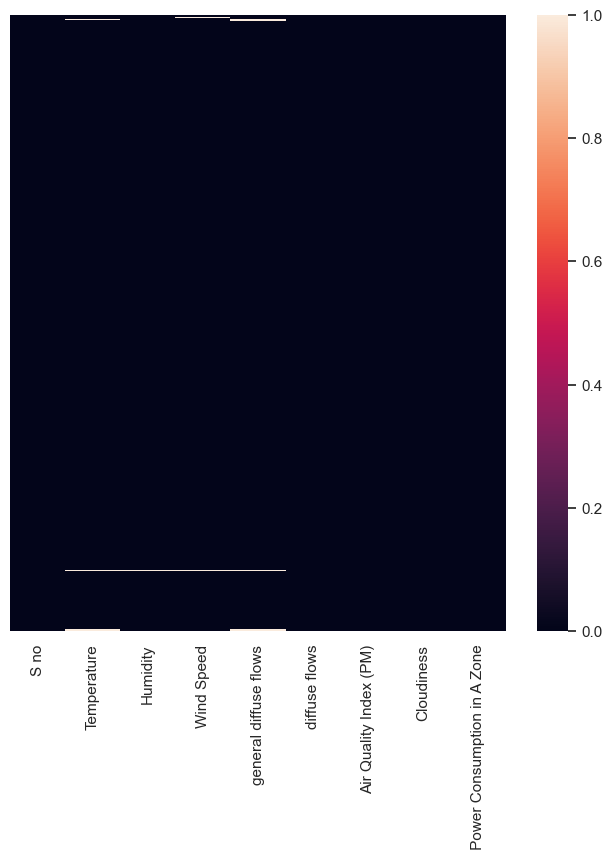

In [25]:
plt.figure(figsize = (8,8))
sns.heatmap(data.isnull(),yticklabels = False)
plt.show()

In [26]:
# as same records having multiple null values and not in large nos. as compared to total rows
# dropping records having null values
data_wo_null = data.dropna()

In [29]:
data.shape

(52583, 9)

In [31]:
data_wo_null.shape

(52145, 9)

In [33]:
# no of rows dropped
print(f'no. of rows dropped {52583 - 52145}')
print(f'no. of rows dropped in % {round((52583 - 52145)/52583*100,2)} only')

no. of rows dropped 438
no. of rows dropped in % 0.83 only


In [35]:
data_wo_null.isnull().sum()

S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [37]:
# extracting numerical values from strings
def numbers(feature_list):
    for i in feature_list:
        data_wo_null[i] = data_wo_null[i].str.extract(r'([0-9.]+)', expand=False)

In [39]:
feature_list = ['Temperature','Humidity','Wind Speed']
numbers(feature_list)

In [41]:
data_wo_null

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52411,52412,7.01,72.4,0.08,0.040,0.096,153.0,0,31160.45627
52412,52413,6.947,72.6,0.082,0.051,0.093,153.0,0,30430.41825
52413,52414,6.9,72.8,0.086,0.084,0.074,157.0,0,29590.87452
52414,52415,6.758,73,0.08,0.066,0.089,150.0,0,28958.17490


In [43]:
# being now numbers in features, changing data types
data_wo_null['Temperature']=data_wo_null['Temperature'].astype(float)
data_wo_null['Humidity']=data_wo_null['Humidity'].astype(float)
data_wo_null['Wind Speed']=data_wo_null['Wind Speed'].astype(float)
data_wo_null.drop('S no', axis=1, inplace=True) #dropping insignificant column
data_clean = data_wo_null.copy()

In [45]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52145 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52145 non-null  float64
 1   Humidity                      52145 non-null  float64
 2   Wind Speed                    52145 non-null  float64
 3   general diffuse flows         52145 non-null  float64
 4   diffuse flows                 52145 non-null  float64
 5   Air Quality Index (PM)        52145 non-null  float64
 6   Cloudiness                    52145 non-null  object 
 7    Power Consumption in A Zone  52145 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.6+ MB


In [47]:
data_clean.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Power Consumption in A Zone
count,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000
mean,18.840984,68.238597,1.969080,182.861960,75.195083,154.499530,31112.183719
std,5.810479,15.571295,2.351476,264.757717,124.433309,2.872062,8008.047631
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,9457.750760
25%,14.430000,58.270000,0.078000,0.062000,0.122000,152.000000,24804.551420
50%,18.840000,69.850000,0.086000,4.987000,4.411000,155.000000,31236.196720
75%,22.920000,81.400000,4.915000,319.600000,101.300000,157.000000,36763.076920
max,40.010000,94.800000,8.500000,1163.000000,936.000000,159.000000,52204.395120


In [49]:
# comparison om mean median for getting idea of data distribution
mean = data_clean.mean()
median = data_clean.median()
pd.DataFrame({'mean':mean,'median':median})

,mean,median
Temperature,18.840984,18.84
Humidity,68.238597,69.85
Wind Speed,1.96908,0.086
general diffuse flows,182.86196,4.987
diffuse flows,75.195083,4.411
Air Quality Index (PM),154.49953,155.0
Cloudiness,0.007038,0.0
Power Consumption in A Zone,31112.183719,31236.19672


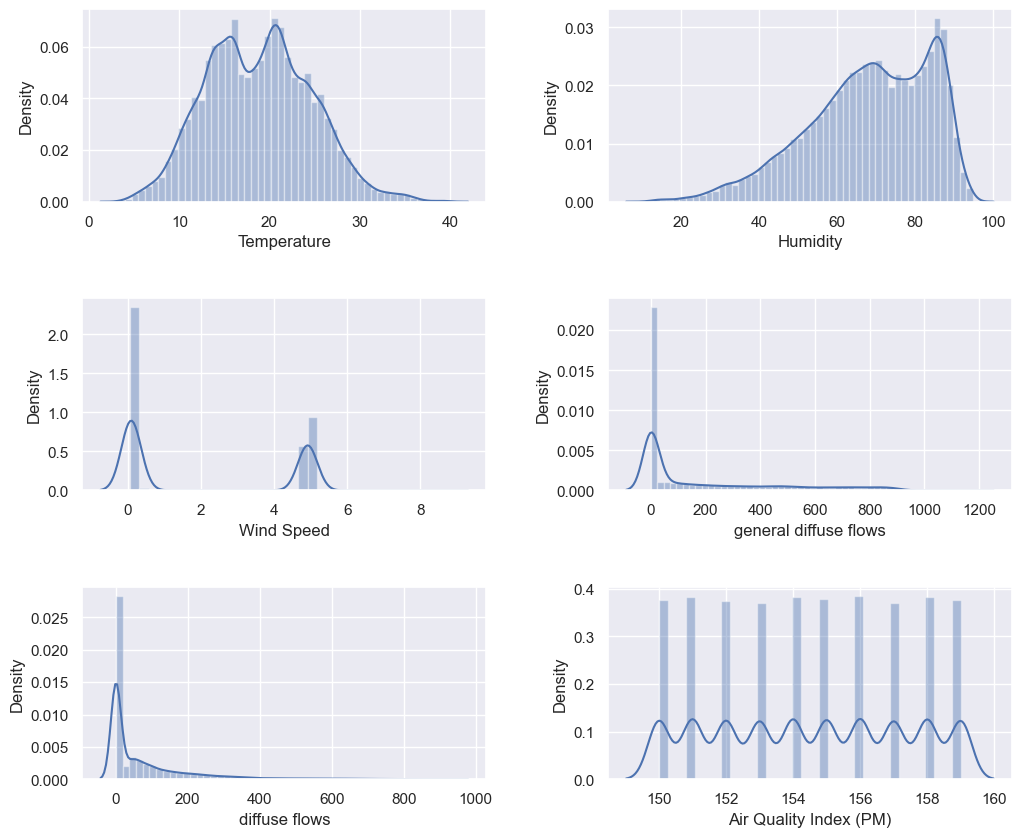

In [51]:
# data visualisation for numerical variables
fig, axs = plt.subplots(3,2, figsize=(12,10))
sns.distplot(data_clean['Temperature'], ax=axs[0,0])
sns.distplot(data_clean['Humidity'], ax=axs[0,1])
sns.distplot(data_clean['Wind Speed'], ax=axs[1,0])
sns.distplot(data_clean['general diffuse flows'], ax=axs[1,1])
sns.distplot(data_clean['diffuse flows'], ax=axs[2,0])
sns.distplot(data_clean['Air Quality Index (PM)'], ax=axs[2,1])
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [52]:
# insights --> wind speed is distributed among 2 ranges
# humidity, diffuse flows and general diffuse flows are having outliers
# AQI is a categorical variable

In [53]:
data_clean['Air Quality Index (PM)'].value_counts()

Air Quality Index (PM)
156.0    5317
151.0    5294
154.0    5287
158.0    5273
155.0    5212
150.0    5204
159.0    5188
152.0    5166
153.0    5103
157.0    5101
Name: count, dtype: int64

In [54]:
# rectifying data type
data_clean['Air Quality Index (PM)']=data_clean['Air Quality Index (PM)'].astype(int)
data_clean['Air Quality Index (PM)']=data_clean['Air Quality Index (PM)'].astype(object)

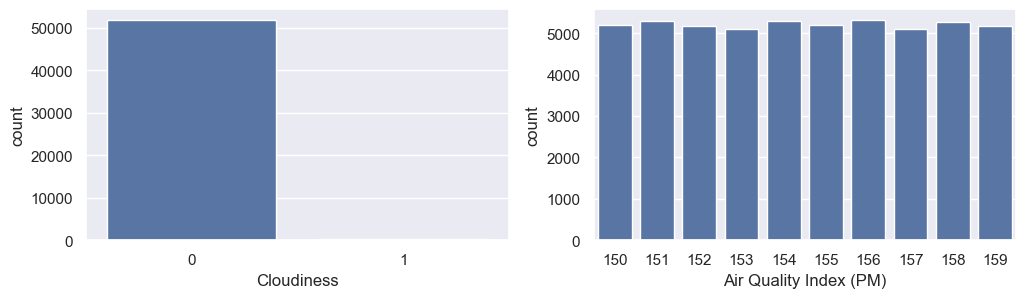

In [58]:
# data visualisation for categorical variables
fig, axs = plt.subplots(1,2, figsize=(12,3))
sns.countplot(data=data_clean, x='Cloudiness', ax=axs[0])
sns.countplot(data=data_clean, x='Air Quality Index (PM)', ax=axs[1])
plt.show()

In [60]:
# insights --> cloudiness is mostly 0 only
# AQI is equally distributed

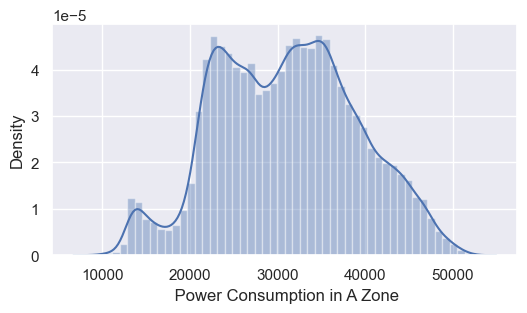

In [63]:
# distribution of target variable Power Consumption in A Zone
plt.figure(figsize=(6,3))
sns.distplot(data_clean[' Power Consumption in A Zone'])
plt.show()

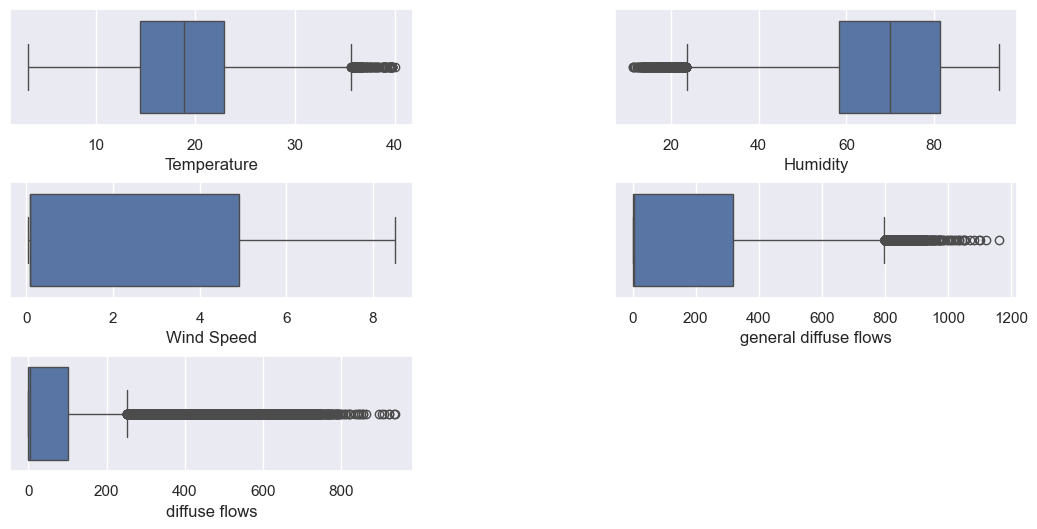

In [65]:
# checking for outliers in numerical variables
fig, axs = plt.subplots(3,2, figsize=(13,6))
sns.boxplot(data = data_clean, x = 'Temperature', ax=axs[0,0])
sns.boxplot(data = data_clean, x = 'Humidity', ax=axs[0,1])
sns.boxplot(data = data_clean, x = 'Wind Speed', ax=axs[1,0])
sns.boxplot(data = data_clean, x = 'general diffuse flows', ax=axs[1,1])
sns.boxplot(data = data_clean, x = 'diffuse flows', ax=axs[2,0])
fig.delaxes(axs[2,1])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [66]:
# as there are big numbers outside IQR so shouldn't be considered as outliers

In [67]:
data_clean.rename(columns={' Power Consumption in A Zone': 'Power Consumption in A Zone'}, inplace=True)
# removing space at beginning

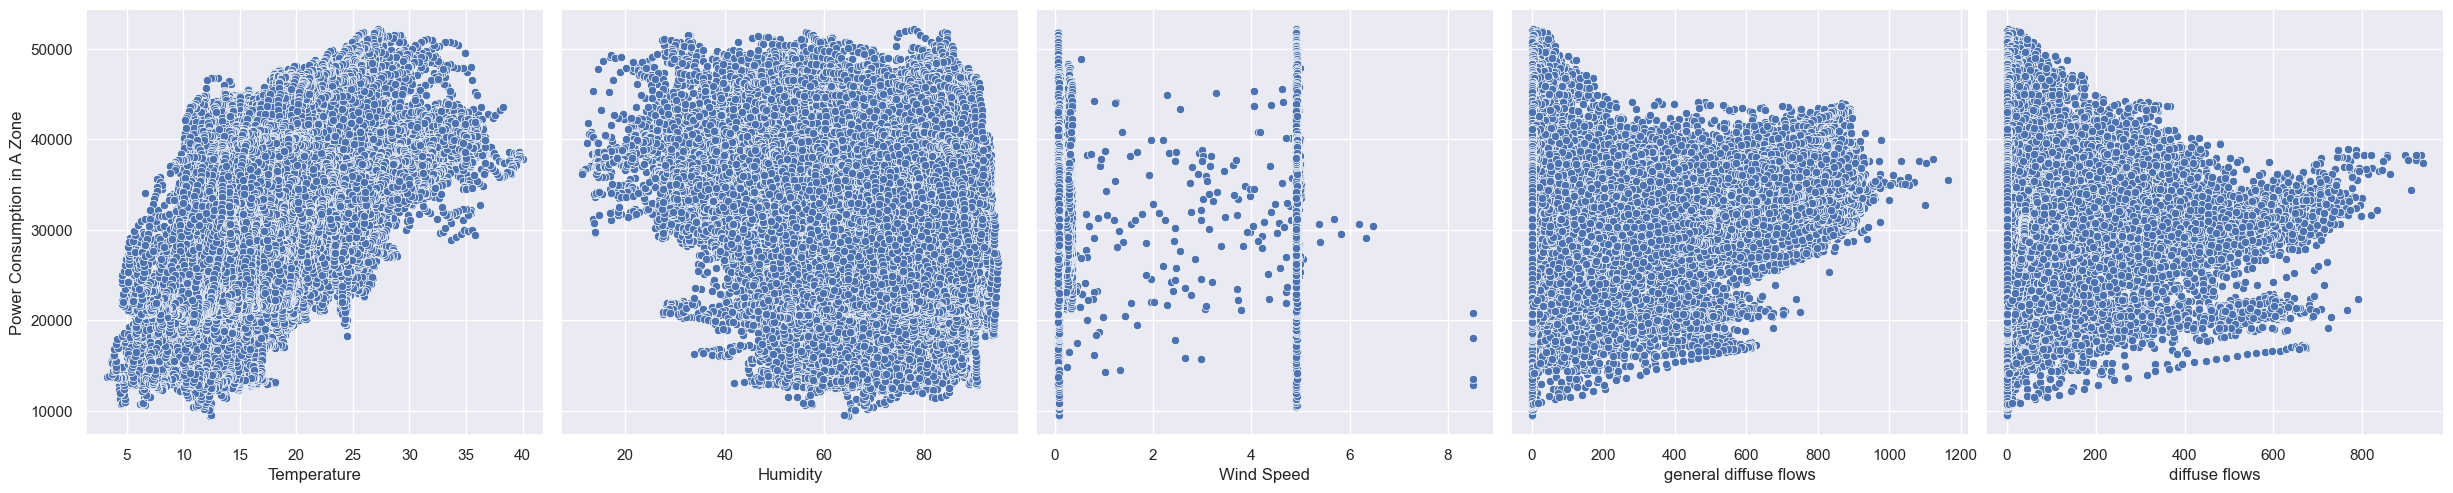

In [71]:
# data visualisation, checking correlation features with Power Consumption
sns.pairplot(data = data_clean, y_vars = "Power Consumption in A Zone", x_vars = ["Temperature", "Humidity", "Wind Speed",'general diffuse flows','diffuse flows'], size = 5)
plt.show()

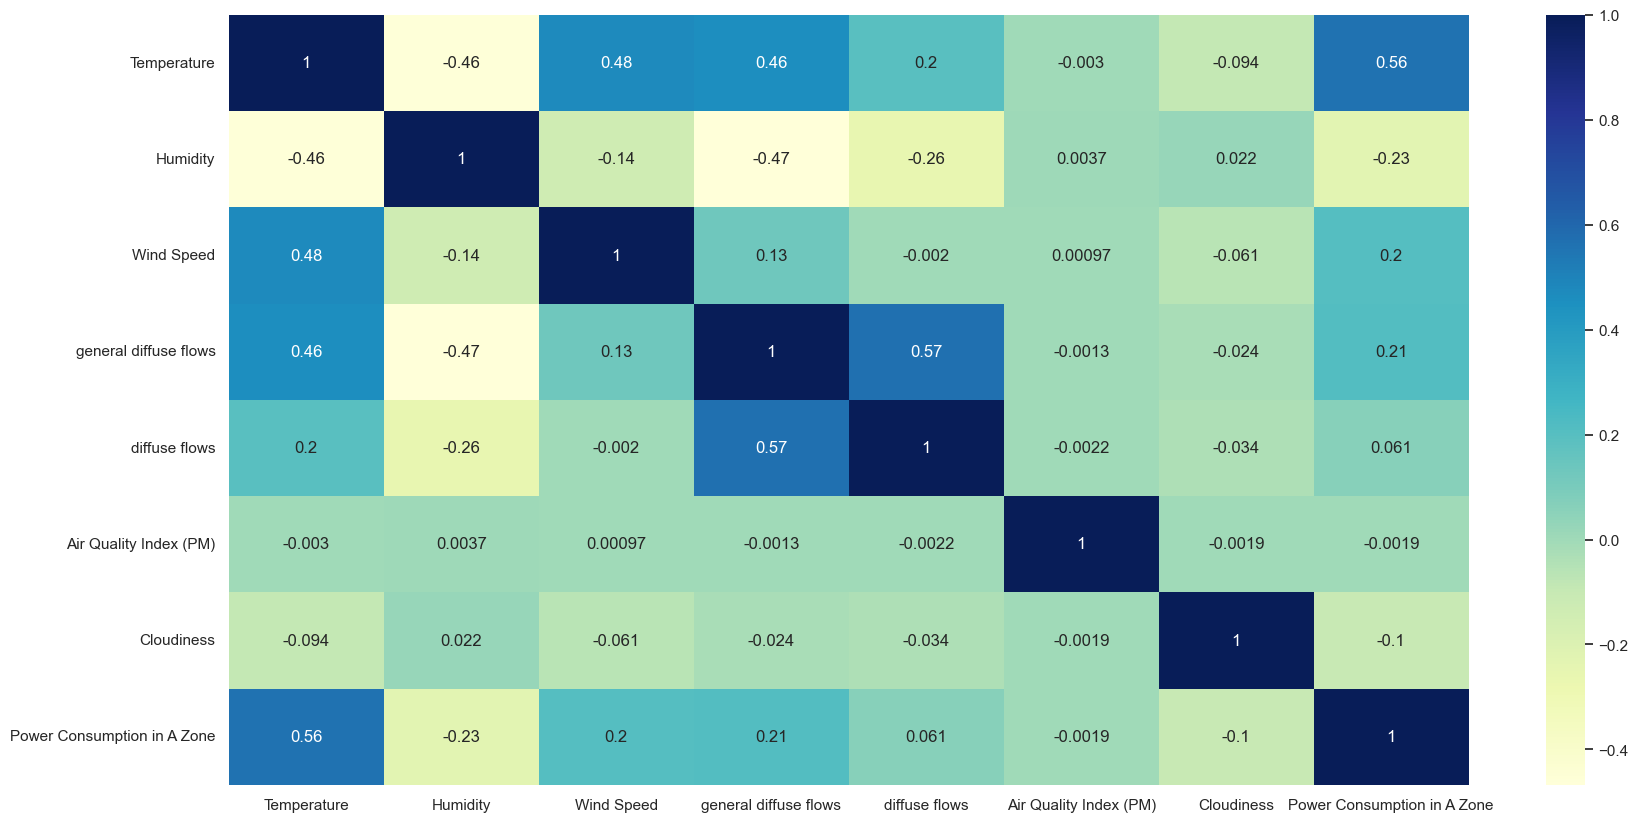

In [72]:
# correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data_clean.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [73]:
# resetting the index
data_reset = data_clean.reset_index(drop=True)

In [74]:
# checking variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerical_features = data_reset.select_dtypes(include=['number'])
numerical_features.drop(['Power Consumption in A Zone'], axis=1, inplace=True)
vif = []
for i in range(numerical_features.shape[1]):
    vif.append(variance_inflation_factor(numerical_features,i))
pd.DataFrame({'VIF':vif},index = numerical_features.columns)

,VIF
Temperature,10.997912
Humidity,6.506682
Wind Speed,2.172938
general diffuse flows,2.855550
diffuse flows,2.017361


In [76]:
# Temperature and humidity are showing high multicollinearity
# checking correlation with target variable
df_temp_hum = data_reset[['Temperature','Humidity', 'Power Consumption in A Zone']]
df_temp_hum.corr()

,Temperature,Humidity,Power Consumption in A Zone
Temperature,1.000000,-0.459829,0.559043
Humidity,-0.459829,1.000000,-0.229862
Power Consumption in A Zone,0.559043,-0.229862,1.000000


In [81]:
# temperature is more correlated that is 0.5590 but for including humidity variance
# creating a new feature including both but humidity/50
data_reset['Temp_Hum'] = data_reset['Temperature'] + data_reset['Humidity']/50
data_reset.drop(['Temperature','Humidity'], axis=1, inplace = True)
data_reset.corr() # shows better correlation with target variable that is 0.5598

,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,Temp_Hum
Wind Speed,1.000000,0.133653,-0.002004,0.000965,-0.060762,0.203309,0.479199
general diffuse flows,0.133653,1.000000,0.565078,-0.001321,-0.023807,0.208957,0.446207
diffuse flows,-0.002004,0.565078,1.000000,-0.002153,-0.034425,0.060905,0.186057
Air Quality Index (PM),0.000965,-0.001321,-0.002153,1.000000,-0.001863,-0.001911,-0.002912
Cloudiness,-0.060762,-0.023807,-0.034425,-0.001863,1.000000,-0.104542,-0.095506
Power Consumption in A Zone,0.203309,0.208957,0.060905,-0.001911,-0.104542,1.000000,0.559871
Temp_Hum,0.479199,0.446207,0.186057,-0.002912,-0.095506,0.559871,1.000000


In [83]:
# dropping insignificant features for target variable
# Air Quality Index (PM) 0.0019 correlation with target variable
# diffuse flows 0.06 correlation with target variable and 0.56 variance explained by general diffuse flows
data_reset.drop(['diffuse flows','Air Quality Index (PM)'], axis=1, inplace = True)
data_reset

,Wind Speed,general diffuse flows,Cloudiness,Power Consumption in A Zone,Temp_Hum
0,0.083,0.051,1,34055.69620,8.035
1,0.083,0.070,1,29814.68354,7.904
2,0.080,0.062,1,29128.10127,7.803
3,0.083,0.091,1,28228.86076,7.621
4,0.081,0.048,1,27335.69620,7.435
...,...,...,...,...,...
52140,0.080,0.040,0,31160.45627,8.458
52141,0.082,0.051,0,30430.41825,8.399
52142,0.086,0.084,0,29590.87452,8.356
52143,0.080,0.066,0,28958.17490,8.218


In [85]:
# outliers treatment
# Wind Speed -> main data points are between 0 to 1 and 4 to 5 only
print(data_reset[(data_reset['Wind Speed']>1) & (data_reset['Wind Speed']<4)].count())
print(data_reset[data_reset['Wind Speed']>5].count())

Wind Speed                     94
general diffuse flows          94
Cloudiness                     94
Power Consumption in A Zone    94
Temp_Hum                       94
dtype: int64
Wind Speed                     23
general diffuse flows          23
Cloudiness                     23
Power Consumption in A Zone    23
Temp_Hum                       23
dtype: int64


In [87]:
# dropping wind speed outliers
rows_drop = data_reset[((data_reset['Wind Speed']>1) & (data_reset['Wind Speed']<4)) | (data_reset['Wind Speed']>5)].index
data_reset.drop(rows_drop, axis=0, inplace = True)
data_reset

,Wind Speed,general diffuse flows,Cloudiness,Power Consumption in A Zone,Temp_Hum
0,0.083,0.051,1,34055.69620,8.035
1,0.083,0.070,1,29814.68354,7.904
2,0.080,0.062,1,29128.10127,7.803
3,0.083,0.091,1,28228.86076,7.621
4,0.081,0.048,1,27335.69620,7.435
...,...,...,...,...,...
52140,0.080,0.040,0,31160.45627,8.458
52141,0.082,0.051,0,30430.41825,8.399
52142,0.086,0.084,0,29590.87452,8.356
52143,0.080,0.066,0,28958.17490,8.218


In [89]:
# dropping general diffuse flows outliers
# only 257 records over 900 can be considered as outliers
data_reset[data_reset['general diffuse flows']>900].count()

Wind Speed                     257
general diffuse flows          257
Cloudiness                     257
Power Consumption in A Zone    257
Temp_Hum                       257
dtype: int64

In [91]:
rows_drop = data_reset[data_reset['general diffuse flows']>900].index
data_reset.drop(rows_drop, axis=0, inplace = True)
data_reset

,Wind Speed,general diffuse flows,Cloudiness,Power Consumption in A Zone,Temp_Hum
0,0.083,0.051,1,34055.69620,8.035
1,0.083,0.070,1,29814.68354,7.904
2,0.080,0.062,1,29128.10127,7.803
3,0.083,0.091,1,28228.86076,7.621
4,0.081,0.048,1,27335.69620,7.435
...,...,...,...,...,...
52140,0.080,0.040,0,31160.45627,8.458
52141,0.082,0.051,0,30430.41825,8.399
52142,0.086,0.084,0,29590.87452,8.356
52143,0.080,0.066,0,28958.17490,8.218


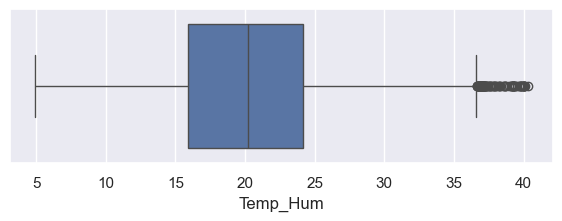

In [93]:
plt.figure(figsize=(7,2))
sns.boxplot(data = data_reset, x = 'Temp_Hum')
plt.show()

In [95]:
# dropping Temp_hump outliers
# only 65 records over 37 can be considered as outliers
data_reset[data_reset['Temp_Hum']>37].count()

Wind Speed                     65
general diffuse flows          65
Cloudiness                     65
Power Consumption in A Zone    65
Temp_Hum                       65
dtype: int64

In [97]:
rows_drop = data_reset[data_reset['Temp_Hum']>37].index
data_reset.drop(rows_drop, axis=0, inplace = True)
data_reset

,Wind Speed,general diffuse flows,Cloudiness,Power Consumption in A Zone,Temp_Hum
0,0.083,0.051,1,34055.69620,8.035
1,0.083,0.070,1,29814.68354,7.904
2,0.080,0.062,1,29128.10127,7.803
3,0.083,0.091,1,28228.86076,7.621
4,0.081,0.048,1,27335.69620,7.435
...,...,...,...,...,...
52140,0.080,0.040,0,31160.45627,8.458
52141,0.082,0.051,0,30430.41825,8.399
52142,0.086,0.084,0,29590.87452,8.356
52143,0.080,0.066,0,28958.17490,8.218


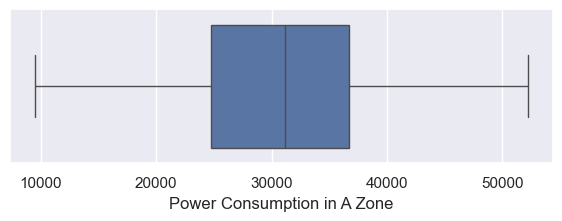

In [99]:
# dropping Power Consumption in A Zone outliers
plt.figure(figsize=(7,2))
sns.boxplot(data = data_reset, x = 'Power Consumption in A Zone')
plt.show()

In [101]:
# only 131 records less than 10000 0r more than 50000 can be considered as outliers
data_reset[(data_reset['Power Consumption in A Zone']<10000) | (data_reset['Power Consumption in A Zone']>50000)].count()

Wind Speed                     131
general diffuse flows          131
Cloudiness                     131
Power Consumption in A Zone    131
Temp_Hum                       131
dtype: int64

In [103]:
rows_drop = data_reset[(data_reset['Power Consumption in A Zone']<10000) | (data_reset['Power Consumption in A Zone']>50000)].index
data_reset.drop(rows_drop, axis=0, inplace = True)
data_reset

,Wind Speed,general diffuse flows,Cloudiness,Power Consumption in A Zone,Temp_Hum
0,0.083,0.051,1,34055.69620,8.035
1,0.083,0.070,1,29814.68354,7.904
2,0.080,0.062,1,29128.10127,7.803
3,0.083,0.091,1,28228.86076,7.621
4,0.081,0.048,1,27335.69620,7.435
...,...,...,...,...,...
52140,0.080,0.040,0,31160.45627,8.458
52141,0.082,0.051,0,30430.41825,8.399
52142,0.086,0.084,0,29590.87452,8.356
52143,0.080,0.066,0,28958.17490,8.218


In [105]:
# resetting the index
data_proc = data_reset.reset_index(drop=True)

In [107]:
# standardisation
scaler = StandardScaler()
cols = ['Wind Speed','general diffuse flows','Temp_Hum']
data_enc = pd.DataFrame(scaler.fit_transform(data_proc[cols]), columns=cols)
data_enc = pd.concat([data_enc, data_proc['Cloudiness']], axis=1)
data_enc = pd.concat([data_enc, data_proc['Power Consumption in A Zone']], axis=1)

In [109]:
data_enc.head()

,Wind Speed,general diffuse flows,Temp_Hum,Cloudiness,Power Consumption in A Zone
0,-0.798722,-0.688292,-2.150397,1,34055.69620
1,-0.798722,-0.688219,-2.173670,1,29814.68354
2,-0.799998,-0.688250,-2.191613,1,29128.10127
3,-0.798722,-0.688138,-2.223945,1,28228.86076
4,-0.799573,-0.688304,-2.256989,1,27335.69620


In [111]:
# Machine Learning model
# separating out target variable
X = data_enc.drop("Power Consumption in A Zone", axis = 1)
y = data_enc["Power Consumption in A Zone"]

In [113]:
X.head()

,Wind Speed,general diffuse flows,Temp_Hum,Cloudiness
0,-0.798722,-0.688292,-2.150397,1
1,-0.798722,-0.688219,-2.173670,1
2,-0.799998,-0.688250,-2.191613,1
3,-0.798722,-0.688138,-2.223945,1
4,-0.799573,-0.688304,-2.256989,1


In [115]:
y.head()

0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name: Power Consumption in A Zone, dtype: float64

In [117]:
# splitting into training and validation dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [119]:
# applying linear regression algorithm
LR = LinearRegression()
LR.fit(X_train, y_train)
print(LR.intercept_)
print(LR.coef_)

31038.186236830872
[ -760.13834874  -408.15587895  4921.65632043 -5082.58371151]


In [121]:
# Evaluation metrics
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'R_square = Train = {R2_train}, Test = {R2_test}')
print(f'Mean absolute error = Train = {mae_train}, Test = {mae_test}')
print(f'Root Mean squared error = Train = {mse_train}, Test = {mse_test}')
print(f'Mean squared error = Train = {rmse_train}, Test = {rmse_test}')

R_square = Train = 0.317685912445547, Test = 0.32822054799309386
Mean absolute error = Train = 5305.197841951767, Test = 5303.245244283039
Root Mean squared error = Train = 43146641.79015582, Test = 43152249.21941057
Mean squared error = Train = 6568.6103393454405, Test = 6569.037160757318


In [123]:
# cross validation with random shuffling
kf=KFold(5, shuffle=True, random_state=9) #for shuffling
cross_val_results=cross_val_score(LR,X_train, y_train,cv=kf)
print(cross_val_results)
print(cross_val_results.mean())

[0.32942506 0.30662463 0.31073738 0.31960331 0.32069102]
0.3174162785010434


In [125]:
# predictions and adding predictions to original dataframe
pred = LR.predict(X)
pred_df = pd.DataFrame(pred, columns=['Predictions'])
data_pred = pd.concat([data_enc, pred_df], axis=1)

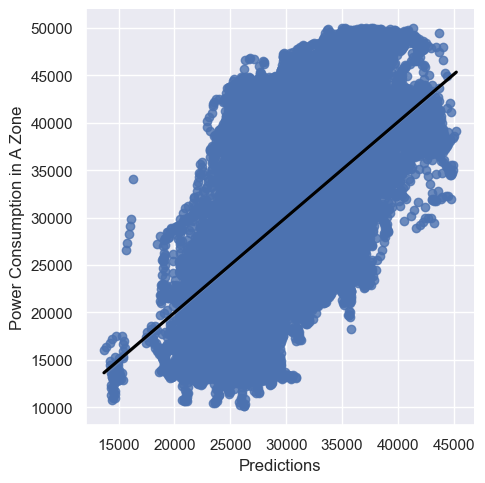

In [127]:
# graph visualisation between original values and predicted values
sns.lmplot(data = data_pred, y= "Power Consumption in A Zone", x= "Predictions",line_kws={'color': 'black'})
plt.show()

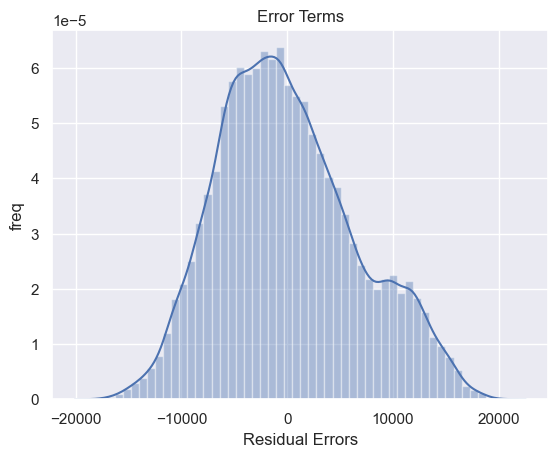

In [128]:
# distribution of residual errors
residuals = (data_pred["Power Consumption in A Zone"] - data_pred["Predictions"])
sns.distplot(residuals)
plt.title('Error Terms')
plt.xlabel('Residual Errors')
plt.ylabel('freq')
plt.show()

In [129]:
# regularisation with Lasso(L1) and Ridge(L2) cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

In [130]:
print("The train score for linear model is {}".format(LR.score(X_train, y_train)))
print("The test score for linear model is {}".format(LR.score(X_test, y_test)))
print("The train score for lasso model is {}".format(lasso_cv.score(X_train, y_train)))
print("The test score for lasso model is {}".format(lasso_cv.score(X_test, y_test)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for linear model is 0.317685912445547
The test score for linear model is 0.32822054799309386
The train score for lasso model is 0.31768588933254116
The test score for lasso model is 0.3282207748738716
The train score for ridge model is 0.3176858686046994
The test score for ridge model is 0.3282214586292501


In [143]:
# Support vector regressor
# taking too much time, hence commented out after one run
#svr_linear = SVR(kernel='linear').fit(X_train,y_train)
#svr_poly = SVR(kernel='poly').fit(X_train,y_train)
#svr_rbf = SVR(kernel='rbf').fit(X_train,y_train)

In [147]:
#y_linear_pred = svr_linear.predict(X_test)
#y_poly_pred = svr_poly.predict(X_test)
#y_rbf_pred = svr_rbf.predict(X_test)
#print("The test score for svr linear model is {}".format(r2_score(y_test, y_linear_pred)))
#print("The test score for svr poly model is {}".format(r2_score(y_test, y_poly_pred)))
#print("The test score for svr rbf model is {}".format(r2_score(y_test, y_rbf_pred)))

The test score for svr linear model is 0.2576657648103814
The test score for svr poly model is 0.2046689491373288
The test score for svr rbf model is 0.15133530526887629


In [163]:
# Decision Tree Regressor
# taking too much time, hence commented out after one run
#tree_model=DecisionTreeRegressor(random_state=11)
#param_tree={'criterion':['squared_error', 'absolute_error'], 'max_depth':[2,4,6,8,10,None]}
#grid_search = GridSearchCV(tree_model, param_tree, cv=5,n_jobs=-1)
#grid_search.fit(X_train,y_train)
#print(grid_search.best_estimator_) # Get the best estimator from the grid search
#print(grid_search.best_params_)
#print(grid_search.best_score_)

DecisionTreeRegressor(max_depth=8, random_state=11)
{'criterion': 'squared_error', 'max_depth': 8}
0.40467556366527974


In [135]:
#Decision Tree Regressor
tree_model=DecisionTreeRegressor(random_state=11)
param_tree={'max_depth':[7,8,9]}
grid_search = GridSearchCV(tree_model, param_tree, cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_) # Get the best estimator from the grid search
print(grid_search.best_params_)
print(grid_search.best_score_)

DecisionTreeRegressor(max_depth=9, random_state=11)
{'max_depth': 9}
0.39903317502334984


In [137]:
dt_model = DecisionTreeRegressor(random_state=1, max_depth=9).fit(X_train,y_train)
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'R_square = Train = {R2_train}, Test = {R2_test}')
print(f'Mean absolute error = Train = {mae_train}, Test = {mae_test}')
print(f'Root Mean squared error = Train = {mse_train}, Test = {mse_test}')
print(f'Mean squared error = Train = {rmse_train}, Test = {rmse_test}')

R_square = Train = 0.456785248850197, Test = 0.4298317333395415
Mean absolute error = Train = 4475.779287350225, Test = 4634.895997860978
Root Mean squared error = Train = 34350591.187403396, Test = 36625179.68721453
Mean squared error = Train = 5860.937739594527, Test = 6051.8740640577225


In [ ]:
# Decision tree regressor giving better predictions that linear regressor

In [143]:
# Random Forest Regressor
# taking too much time, hence commented out after one run
#rf_model = RandomForestRegressor(random_state=0)
#param_dist = {'max_depth': [8,9,10],'n_estimators':[100,150,200]}
#grid_search = GridSearchCV(rf_model, param_dist, cv=5,n_jobs=-1)
#grid_search.fit(X_train,y_train)
#print(grid_search.best_estimator_) # Get the best estimator from the grid search
#print(grid_search.best_params_)
#print(grid_search.best_score_)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=0)
{'max_depth': 10, 'n_estimators': 200}
0.44531963260315005


In [167]:
rf_model = RandomForestRegressor(random_state=1, max_depth=13, n_estimators=200, oob_score=True).fit(X_train,y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
oob_score = rf_model.oob_score_
print(f'R_square = Train = {R2_train}, Test = {R2_test}')
print(f'Mean absolute error = Train = {mae_train}, Test = {mae_test}')
print(f'Root Mean squared error = Train = {mse_train}, Test = {mse_test}')
print(f'Mean squared error = Train = {rmse_train}, Test = {rmse_test}')
print(f'oob score = {oob_score}')

R_square = Train = 0.632826942459622, Test = 0.4759764999173226
Mean absolute error = Train = 3608.910553787674, Test = 4380.184811188674
Root Mean squared error = Train = 23218462.98890413, Test = 33661036.52745104
Mean squared error = Train = 4818.554035071531, Test = 5801.813210320635
oob score = 0.45677201833136105


In [ ]:
# Random forest regressor giving better predictions that decision tree regressor

In [171]:
# Adaboost Regressor
# taking too much, hence commented out after one run
#ada_model = AdaBoostRegressor(random_state=0)
#param_dist = {'n_estimators':[50,100,150],'loss':['linear','square','exponential'], 'learning_rate':[0.3,0.6,1]}
#grid_search = GridSearchCV(ada_model, param_dist, cv=5,n_jobs=-1)
#grid_search.fit(X_train,y_train)
#print(grid_search.best_estimator_) # Get the best estimator from the grid search
#print(grid_search.best_params_)
#print(grid_search.best_score_)

AdaBoostRegressor(learning_rate=0.6, random_state=0)
{'learning_rate': 0.6, 'loss': 'linear', 'n_estimators': 50}
0.3280375415291986


In [191]:
ada_model = AdaBoostRegressor(random_state=1, learning_rate=0.5).fit(X_train,y_train)
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'R_square = Train = {R2_train}, Test = {R2_test}')
print(f'Mean absolute error = Train = {mae_train}, Test = {mae_test}')
print(f'Root Mean squared error = Train = {mse_train}, Test = {mse_test}')
print(f'Mean squared error = Train = {rmse_train}, Test = {rmse_test}')

R_square = Train = 0.3296109862316168, Test = 0.33997267798733555
Mean absolute error = Train = 5328.133916164921, Test = 5319.697762666604
Root Mean squared error = Train = 42392550.82771813, Test = 42397342.47009663
Mean squared error = Train = 6510.956214544691, Test = 6511.324171786921


In [195]:
# XGBoost regressor
# taking too much, hence commented out after one run
#data_xgb = data_enc
#data_xgb['Cloudiness']=data_xgb['Cloudiness'].astype(int)
#X = data_xgb.drop("Power Consumption in A Zone", axis = 1)
#y = data_xgb["Power Consumption in A Zone"]
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
#xgb = XGBRegressor()
#param_dist = {'n_estimators':[10,20,30],'learning_rate':[0.3,0.5,0.7], 'max_depth':[4,5,6], 'reg_alpha':[0.3,0.5,0.7], 'reg_lambda':[0.3,0.5,0.7]}
#grid_search = GridSearchCV(xgb, param_dist, cv=5,n_jobs=-1)
#grid_search.fit(X_train,y_train)
#print(grid_search.best_estimator_) # Get the best estimator from the grid search
#print(grid_search.best_params_)
#print(grid_search.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 30, 'reg_alpha': 0.7, 'reg_lambda': 0.7}
0.4420231721642013


In [245]:
xgb_model = xgboost.XGBRegressor(random_state=1,learning_rate=0.5, max_depth=6, n_estimators=30, reg_alpha=0.5, reg_lambda=0.7).fit(X_train,y_train)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'R_square = Train = {R2_train}, Test = {R2_test}')
print(f'Mean absolute error = Train = {mae_train}, Test = {mae_test}')
print(f'Root Mean squared error = Train = {mse_train}, Test = {mse_test}')
print(f'Mean squared error = Train = {rmse_train}, Test = {rmse_test}')

R_square = Train = 0.5096477747485044, Test = 0.45281840133789375
Mean absolute error = Train = 4249.457778910405, Test = 4510.451634099319
Root Mean squared error = Train = 31173551.725473586, Test = 34732631.67519312
Mean squared error = Train = 5583.328015214007, Test = 5893.43971507244


In [263]:
# unproceesed data R square value on different regression models
raw_data = data_wo_null
raw_data['Cloudiness']=raw_data['Cloudiness'].astype(int)
raw_data['Temperature']=raw_data['Temperature'].astype(float)
raw_data['Humidity']=raw_data['Temperature'].astype(float)
raw_data['Wind Speed']=raw_data['Temperature'].astype(float)
X = raw_data.drop(" Power Consumption in A Zone", axis = 1)
y = raw_data[" Power Consumption in A Zone"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lr = LR.fit(X_train, y_train)
svr = SVR(kernel='linear').fit(X_train,y_train)
dt_model = DecisionTreeRegressor(random_state=1, max_depth=9).fit(X_train,y_train)
rf_model = RandomForestRegressor(random_state=1, max_depth=13, n_estimators=200, oob_score=True).fit(X_train,y_train)
ada_model = AdaBoostRegressor(random_state=1, learning_rate=0.5).fit(X_train,y_train)
xgb_model = xgboost.XGBRegressor(random_state=1,learning_rate=0.5, max_depth=6, n_estimators=30, reg_alpha=0.5, reg_lambda=0.7).fit(X_train,y_train)
y_test_lr = lr.predict(X_test)
y_test_svr = svr.predict(X_test)
y_test_dt_model = dt_model.predict(X_test)
y_test_rf_model = rf_model.predict(X_test)
y_test_ada_model = ada_model.predict(X_test)
y_test_xgb_model = xgb_model.predict(X_test)
print(f'Linear Regression = {r2_score(y_test, y_test_lr)}')
print(f'Support Vector Regression = {r2_score(y_test, y_test_svr)}')
print(f'Decision Tree Regression = {r2_score(y_test, y_test_dt_model)}')
print(f'Random Forest Regression = {r2_score(y_test, y_test_rf_model)}')
print(f'Ada Boost Regression = {r2_score(y_test, y_test_ada_model)}')
print(f'XGBoost Regression = {r2_score(y_test, y_test_xgb_model)}')

Linear Regression = 0.32269144160997576
Support Vector Regression = 0.278436958101799
Decision Tree Regression = 0.37466337326176713
Random Forest Regression = 0.40435128365303985
Ada Boost Regression = 0.3284557335875917
XGBoost Regression = 0.40080879260642854


In [267]:
# proceesed data R square value on different regression models
data_procd = data_enc
data_procd['Cloudiness']=data_procd['Cloudiness'].astype(int)
X = data_procd.drop("Power Consumption in A Zone", axis = 1)
y = data_procd["Power Consumption in A Zone"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
lr = LR.fit(X_train, y_train)
svr = SVR(kernel='linear').fit(X_train,y_train)
dt_model = DecisionTreeRegressor(random_state=1, max_depth=9).fit(X_train,y_train)
rf_model = RandomForestRegressor(random_state=1, max_depth=13, n_estimators=200, oob_score=True).fit(X_train,y_train)
ada_model = AdaBoostRegressor(random_state=1, learning_rate=0.5).fit(X_train,y_train)
xgb_model = xgboost.XGBRegressor(random_state=1,learning_rate=0.5, max_depth=6, n_estimators=30, reg_alpha=0.5, reg_lambda=0.7).fit(X_train,y_train)
y_test_lr = lr.predict(X_test)
y_test_svr = svr.predict(X_test)
y_test_dt_model = dt_model.predict(X_test)
y_test_rf_model = rf_model.predict(X_test)
y_test_ada_model = ada_model.predict(X_test)
y_test_xgb_model = xgb_model.predict(X_test)
print(f'Linear Regression = {r2_score(y_test, y_test_lr)}')
print(f'Support Vector Regression = {r2_score(y_test, y_test_svr)}')
print(f'Decision Tree Regression = {r2_score(y_test, y_test_dt_model)}')
print(f'Random Forest Regression = {r2_score(y_test, y_test_rf_model)}')
print(f'Ada Boost Regression = {r2_score(y_test, y_test_ada_model)}')
print(f'XGBoost Regression = {r2_score(y_test, y_test_xgb_model)}')

Linear Regression = 0.31495197322990254
Support Vector Regression = 0.25002626605539047
Decision Tree Regression = 0.4072698952275623
Random Forest Regression = 0.45896527885384997
Ada Boost Regression = 0.32592115163835844
XGBoost Regression = 0.4388724942800283
